In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

## Importando o dataframe, conferindo seu shape e seus tipos de dados:

Observação: O csv utilizado aqui tem apenas fins didáticos e foi disponibilizado pela escola online mentorama.
www.mentorama.com.br

In [2]:
df = pd.read_csv("dataframe_exercicio_processamento.csv")
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN


In [3]:
#Dimensões do data frame:

df.shape

(29170, 9)

In [4]:
#Tipos das variáveis:

df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

## Conferindo nulls nas variáveis:

In [5]:
#Existem variáveis faltantes no data set?

print("Número de variáveis faltantes no data set:\n", df.isnull().sum())

#Idade com 99, Nome e dívida estão completamente vazias.

Número de variáveis faltantes no data set:
 idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64


## Categorias das variáveis: estado civil, cor e sexo:

In [6]:
#Exibindo categorias das variáveis estado_civil, cor e sexo:

print("\nSituação do Estado civil:\n",df.estado_civil.value_counts())
print("\nSituação da cor:\n",df.cor.value_counts())
print("\nSituação do sexo:\n",df.sexo.value_counts())


Situação do Estado civil:
 Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64

Situação da cor:
 White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64

Situação do sexo:
 Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64


O problema facilmente perceptível é a variável sexo conter valores cuja categoria é "?". Podendo ser interpretado como faltante, no caso, pessoas que preferiram não relatar o seu sexo. Levando em conta o exercício tratarei como dados faltantes substituindo-os pela moda.

## Tratando todas as variáveis faltantes até agora:

In [7]:
#Começando por nome e dívida, droparemos as colunas já que não contém nenhuma informação:

df.drop(["nome","dívida"],axis =1, inplace = True)
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K
...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K
29167,58.0,9,Widowed,White,Female,40,<=50K
29168,22.0,9,Never-married,White,Male,20,<=50K


In [8]:
#Tratando a idade:
#A idade tem poucos dados faltantes então preencherei-os com a média:
df.idade.describe()

count    29071.000000
mean        38.654088
std         13.720345
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: idade, dtype: float64

In [9]:
#pegando a media da idade.
media_idade = df.idade.mean()
media_idade

38.654088266657496

In [10]:
#Rastreando as linhas com valores faltantes:
df.idade.loc[np.isnan(df.idade)]

116     NaN
523     NaN
733     NaN
771     NaN
985     NaN
         ..
27743   NaN
27778   NaN
27878   NaN
27883   NaN
28326   NaN
Name: idade, Length: 99, dtype: float64

In [11]:
#Preenchendo valores com a média:
df.idade.fillna(media_idade, inplace = True)

In [12]:
#conferindo a idade:
df.idade.isnull().sum()

0

In [13]:
#Tratando a variável sexo:

#Descobrindo valores que mais se repetem:
df.sexo.value_counts().idxmax()

'Male'

In [14]:
#Substituindo no dataframe:
sex_dic= {'?':'Male'}
df.sexo.replace(sex_dic, inplace = True)

In [15]:
#Conferindo
df.sexo.value_counts()

Male      20118
Female     9052
Name: sexo, dtype: int64

## Aplicando transformações MinMax na variável tempo educação, e StandardScaler na variável horas por semana.

In [16]:
#MinMax na tempo_educação:
mm_scaler = MinMaxScaler() #Variável de apoio.

In [17]:
#Transformando a coluna num array:
tp_edu = df.tempo_educacao.values.reshape(-1,1)
tp_edu

array([[13],
       [13],
       [ 9],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [18]:
#Fitando
mm_scaler.fit(tp_edu)

MinMaxScaler()

In [19]:
#Transformando:
mm_scaler.transform(tp_edu)

array([[0.8       ],
       [0.8       ],
       [0.53333333],
       ...,
       [0.53333333],
       [0.53333333],
       [0.53333333]])

In [20]:
#Data Frame com antes e depois:
pd.DataFrame(np.c_[df.tempo_educacao.values.reshape(-1,1), mm_scaler.transform(tp_edu)])

,0,1
0,13.0,0.800000
1,13.0,0.800000
2,9.0,0.533333
3,7.0,0.400000
4,14.0,0.866667
...,...,...
29165,12.0,0.733333
29166,9.0,0.533333
29167,9.0,0.533333
29168,9.0,0.533333


In [21]:
#aplicando StandardScaler na variável horas_por_semana
ss_scaler = StandardScaler() #variável de apoio

In [22]:
#Array + reshape
hps = df.horas_por_semana.values.reshape(-1,1)
hps

array([[40],
       [13],
       [40],
       ...,
       [40],
       [20],
       [40]], dtype=int64)

In [23]:
#fitando
ss_scaler.fit(hps)

StandardScaler()

In [24]:
#transformando:
ss_scaler.transform(hps)

array([[-0.03605983],
       [-2.21049975],
       [-0.03605983],
       ...,
       [-0.03605983],
       [-1.64675606],
       [-0.03605983]])

In [25]:
#antes e depois:
pd.DataFrame(np.c_[hps, ss_scaler.transform(hps)])

,0,1
0,40.0,-0.036060
1,13.0,-2.210500
2,40.0,-0.036060
3,40.0,-0.036060
4,40.0,-0.036060
...,...,...
29165,38.0,-0.197129
29166,40.0,-0.036060
29167,40.0,-0.036060
29168,20.0,-1.646756


## Aplicando OneHotEncoding em estado civil, cor e sexo:

In [26]:
#Atribuindo, pegando os arrays:
ohe = OneHotEncoder()


est_civ_ohe = df.estado_civil.values.reshape(-1,1)
cor_ohe = df.cor.values.reshape(-1,1)
sexo_ohe = df.sexo.values.reshape(-1,1)

In [27]:
#Fitando Estado civil
ohe.fit(est_civ_ohe)

OneHotEncoder()

In [28]:
#Transformando estado civil
ohe.transform(est_civ_ohe)

<29170x7 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [29]:
#pegando o array:
ohe.transform(est_civ_ohe).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [30]:
# Salvando a variável estado civil transformada em um array separado:
data_est_ohe = pd.DataFrame(ohe.transform(est_civ_ohe).toarray(), columns = ohe.categories_[0].tolist())
data_est_ohe

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29165,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
#Trabalhando a cor:
ohe.fit(cor_ohe)

OneHotEncoder()

In [32]:
#transformando a cor:

ohe.transform(cor_ohe)

<29170x5 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [33]:
#Salvando num novo dataframe para a cor:
data_cor_ohe = pd.DataFrame(ohe.transform(cor_ohe).toarray(), columns = ohe.categories_[0].tolist())
data_cor_ohe

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
29165,0.0,0.0,0.0,0.0,1.0
29166,0.0,0.0,0.0,0.0,1.0
29167,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0


In [34]:
#Trabalhando a variavel sexo.

ohe.fit(sexo_ohe)

OneHotEncoder()

In [35]:
#Transformando:
ohe.transform(sexo_ohe)

<29170x2 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [36]:
#Salvando num novo dataframe para o sexo:
data_sexo_ohe = pd.DataFrame(ohe.transform(sexo_ohe).toarray(), columns = ohe.categories_[0].tolist())
data_sexo_ohe

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
29165,1.0,0.0
29166,0.0,1.0
29167,1.0,0.0
29168,0.0,1.0


## Detectando outliers na idade:

In [37]:
#Tendo noção das informações da idade:
df.idade.describe()

count    29170.000000
mean        38.654088
std         13.697042
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: idade, dtype: float64

Percebendo que a idade máxima é 90 e a mediana está em 37 já indica a presença de outliers.

<AxesSubplot:>

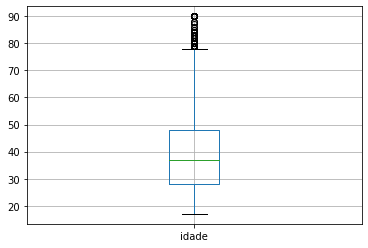

In [38]:
#boxplot para visualizarmos essa distribuição:
df.boxplot(column ='idade')

In [39]:
#Trazendo a função detecta outliers com seu valor padrão:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x,25)
    limite_inf = np.maximum(np.percentile(x,25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x,75) + limite *iqr, np.max(x))
    return np.where((x <limite_inf) | (x>limite_sup), 1, 0)

In [40]:
#Alicando a função e criando uma nova coluna no data frame:
df['outlier_idade'] = detecta_outlier(df.idade)
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


In [41]:
#Descobrindo quantos outliers nós temos:
df.outlier_idade.value_counts()

0    29044
1      126
Name: outlier_idade, dtype: int64

In [42]:
#Dropando as linhas cuja idade é um valor outlier:
df.drop(df.loc[df['outlier_idade'] == 1].index, axis = 0, inplace=True)

In [43]:
#Conferindo o drop:
df.outlier_idade.value_counts()

0    29044
Name: outlier_idade, dtype: int64

In [44]:
#dropando a coluna 'outlier_idade' que não é mais necessária:
df.drop(columns=['outlier_idade'],axis= 1, inplace=True)

<AxesSubplot:>

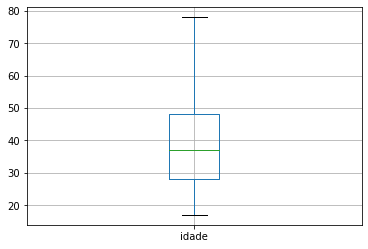

In [45]:
#Conferindo o boxplot novamente:
df.boxplot(column= 'idade')

## Criando a função de limpeza do data frame segundo os parâmetros utilizados neste exercício:

In [46]:

def dfcleaning (df):
    dff = df.copy() #cria uma cópia do df para trabalhar dentro da função
    
    #identificando as colunas entre numéricas e categóricas:
    for c in df.columns:
        cols_numericas = df.select_dtypes(include ='number')
        cols_categoricas = df.select_dtypes(include ='object')
        
    
    #identificando colunas com 80% de dados faltantes:
    temp = (df.isnull().sum() / df.shape[0]) >= 0.8 # delimita que se for mais de 80%
    variaveis_80percfaltantes = temp.loc[temp == True].index.tolist() #separa as variáveis que tem 80% faltantes.
    for v in variaveis_80percfaltantes: # loop para dropar uma a uma, as colunas com dados faltantes > 80%
        dff = dff.drop(v, axis = 1)
        
    cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist()))) #Transforma colunas para lista
    #cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist()))) #Transforma colunas para lista
    
    #loop para preencher a variável idade com a média:
    for v in cols_numericas: #Loop para preencher o dff com a média
        dff[v] = dff[v].fillna(dff[v].mean())
        
    #for v in cols_categoricas: #loop para preencher o dff com a moda.     #não utilizado já que não há necessidade nesse caso.
        #mode_v = dff[v].value_counts().idxmax()
        #dff[v] = dff[v].fillna(mode_v)
        
    #Tratando a variável sexo:    
    sex_dic= {'?':'Male'}
    dff.sexo.replace(sex_dic, inplace = True)
    
    
    #MinMax na tempo_educação:
    mm_scaler = MinMaxScaler()
    tp_edu = df.tempo_educacao.values.reshape(-1,1)
    mm_scaler.fit(tp_edu)
    #Adicionando ao DataFrame:
    dff['MinMax_tmp_edu'] = mm_scaler.transform(tp_edu)
    
    
    #aplicando StandardScaler na variável horas_por_semana
    ss_scaler = StandardScaler()
    hps = df.horas_por_semana.values.reshape(-1,1)
    ss_scaler.fit(hps)
    #Adicionando ao DataFrame:
    dff['SS_hps'] = ss_scaler.transform(hps) 
    
    
    
    #One Hot Encoding:
    ohe = OneHotEncoder()
    
    #arrays:
    est_civ_ohe = df.estado_civil.values.reshape(-1,1)
    cor_ohe = df.cor.values.reshape(-1,1)
    sexo_ohe = df.sexo.values.reshape(-1,1)
    
    #fitando transformando e adicionando ao dff, 1 a 1:
    ohe.fit(est_civ_ohe)
    data_est_civ = pd.DataFrame(ohe.transform(est_civ_ohe).toarray(), columns = ohe.categories_[0].tolist())
    
    ohe.fit(cor_ohe)
    data_cor_ohe = pd.DataFrame(ohe.transform(cor_ohe).toarray(), columns = ohe.categories_[0].tolist())
    
    ohe.fit(sexo_ohe)
    data_sexo_ohe = pd.DataFrame(ohe.transform(sexo_ohe).toarray(), columns = ohe.categories_[0].tolist())
    
    
    
    
    
    
    ### Por conta do onehotencoder criar muitas colunas, eu separei esse código para caso queria ser visto com todos os ohe.
    ### Para ver o data frame com todas as colunas basta retirar o # da próxima linha.
    
    
    #dff = pd.concat([dff, data_est_civ, data_cor_ohe, data_sexo_ohe], axis =1 )
    
    
    
    
    
    
    
    #detectando outliers na idade:
    limite = 1.5
    iqr = np.percentile(dff.idade, 75) - np.percentile(dff.idade,25)
    limite_inf = np.maximum(np.percentile(dff.idade,25) - limite * iqr, np.min(dff.idade))
    limite_sup = np.minimum(np.percentile(dff.idade,75) + limite * iqr, np.max(dff.idade))
    outlier_idade = np.where((dff.idade <limite_inf) | (dff.idade>limite_sup), 1, 0)
    dff['outlier_idade'] = outlier_idade
    dff.drop(dff.loc[dff['outlier_idade'] == 1].index, axis = 0, inplace=True)
    dff.drop(columns=['outlier_idade'], axis =1, inplace=True) #dropando a coluna desnecessária.
    
    return dff

In [47]:
#importando o mesmo df para testar as tranformações do início:
df2 = pd.read_csv('dataframe_exercicio_processamento.csv')
df2

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN


In [48]:
df2_clean = dfcleaning(df2)
df2_clean

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,MinMax_tmp_edu,SS_hps
0,39.0,13,Never-married,White,Male,40,<=50K,0.800000,-0.036060
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.800000,-2.210500
2,38.0,9,Divorced,White,Male,40,<=50K,0.533333,-0.036060
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.400000,-0.036060
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.866667,-0.036060
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.733333,-0.197129
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.533333,-0.036060
29167,58.0,9,Widowed,White,Female,40,<=50K,0.533333,-0.036060
29168,22.0,9,Never-married,White,Male,20,<=50K,0.533333,-1.646756


In [49]:
#Conferindo os resultados:
df2_clean.sexo.value_counts()
#Sem as '?'

Male      20028
Female     9016
Name: sexo, dtype: int64

In [50]:
#Sem nulls na idade:
df2_clean.idade.isnull().sum()

0

<AxesSubplot:>

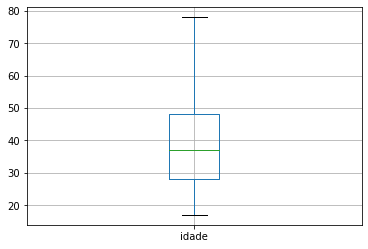

In [51]:
#outliers na idade:
df2_clean.boxplot(column='idade')